In [1]:
#START WEEK1_ANALYSIS
# This script performs initial data analysis for the Pollution Drift Predictor project.
# It loads the dataset, checks for missing values, and provides basic statistics.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os

sys.path.append(os.path.abspath(".."))  # Adds project root to Python path
sys.path.append(os.path.abspath("."))  # Adds current directory to Python path


In [2]:
df = pd.read_csv("data/data.csv", encoding='ISO-8859-1', engine='python')
df.head()


,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01


In [3]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   stn_code                     291665 non-null  object 
 1   sampling_date                435739 non-null  object 
 2   state                        435742 non-null  object 
 3   location                     435739 non-null  object 
 4   agency                       286261 non-null  object 
 5   type                         430349 non-null  object 
 6   so2                          401096 non-null  float64
 7   no2                          419509 non-null  float64
 8   rspm                         395520 non-null  float64
 9   spm                          198355 non-null  float64
 10  location_monitoring_station  408251 non-null  object 
 11  pm2_5                        9314 non-null    float64
 12  date                         435735 non-null  object 
dtyp

stn_code                       144077
sampling_date                       3
state                               0
location                            3
agency                         149481
type                             5393
so2                             34646
no2                             16233
rspm                            40222
spm                            237387
location_monitoring_station     27491
pm2_5                          426428
date                                7
dtype: int64

In [4]:
# Drop Sparse or Irrelevant Columns
df.drop(columns=['pm2_5', 'stn_code', 'agency', 'location_monitoring_station'], inplace=True, errors='ignore')


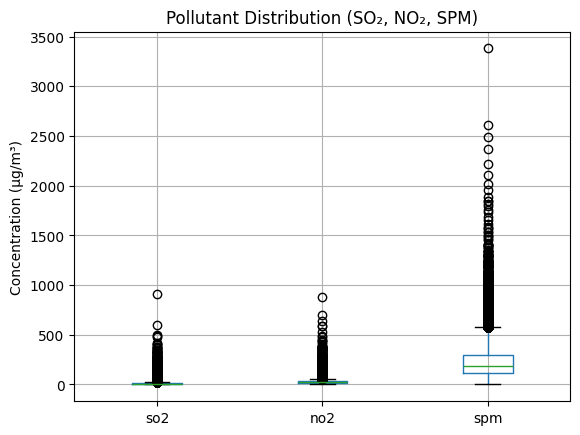

In [5]:
# Distribution of Key Pollutants
df[['so2', 'no2', 'spm']].boxplot()
plt.title("Pollutant Distribution (SO₂, NO₂, SPM)")
plt.ylabel("Concentration (µg/m³)")
plt.grid(True)
plt.show()


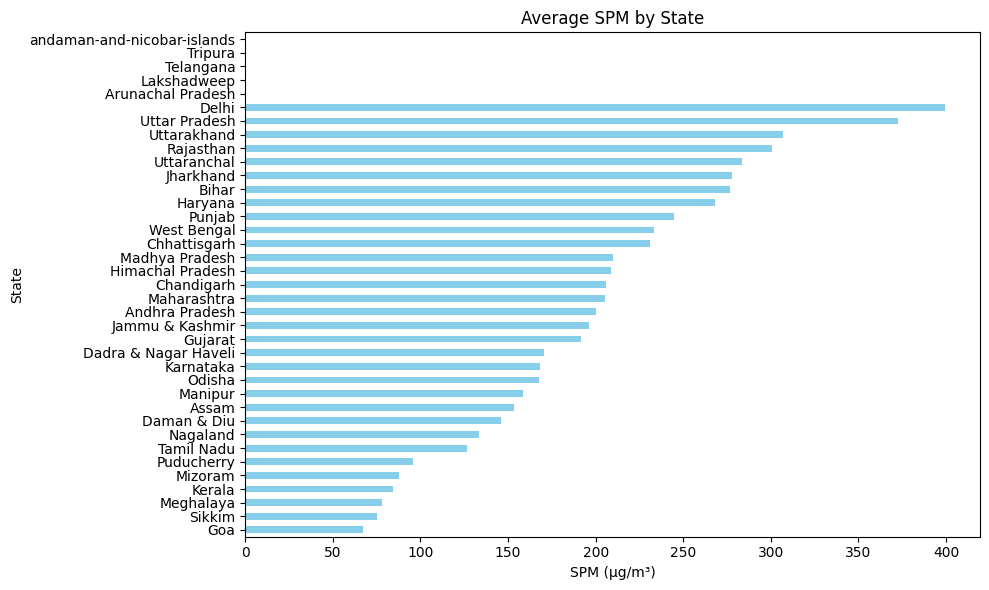

In [6]:
# Average SPM by State
df.groupby('state')['spm'].mean().sort_values().plot(kind='barh', figsize=(10,6), color='skyblue')
plt.title("Average SPM by State")
plt.xlabel("SPM (µg/m³)")
plt.ylabel("State")
plt.tight_layout()
plt.show()


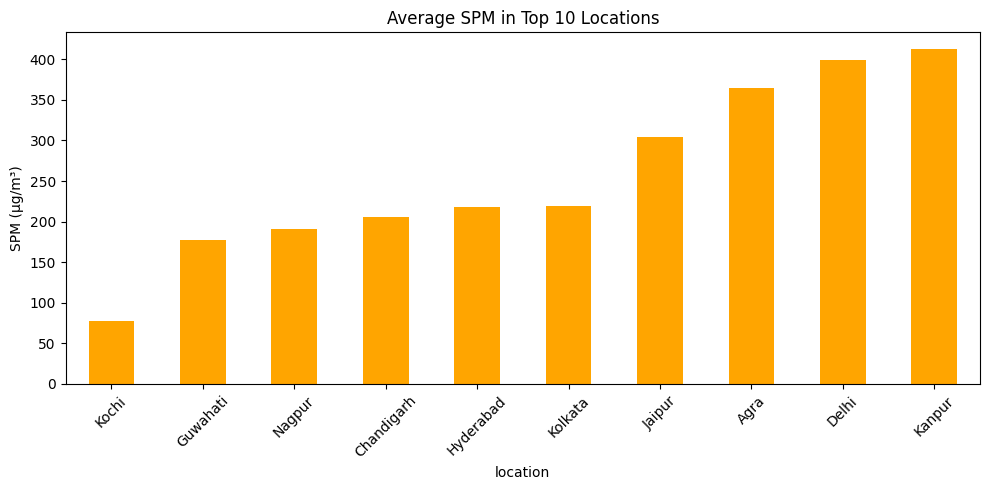

In [7]:
# Average SPM in Top 10 Locations

top_locations = df['location'].value_counts().head(10).index
df[df['location'].isin(top_locations)].groupby('location')['spm'].mean().sort_values().plot(kind='bar', figsize=(10,5), color='orange')
plt.title("Average SPM in Top 10 Locations")
plt.ylabel("SPM (µg/m³)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


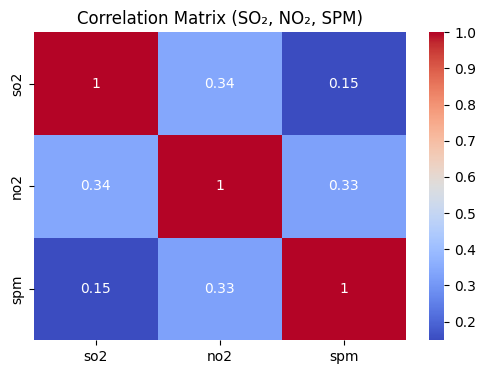

In [8]:
# Correlation Heatmapss

plt.figure(figsize=(6,4))
sns.heatmap(df[['so2', 'no2', 'spm']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix (SO₂, NO₂, SPM)")
plt.show()


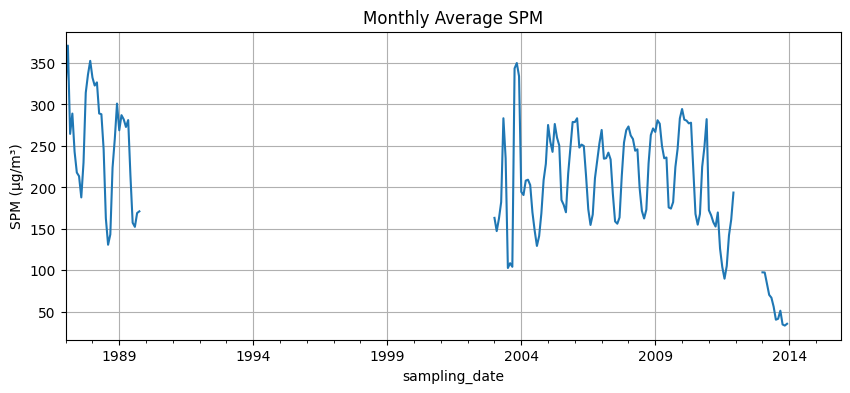

In [14]:
# Time Series of Monthly Average SPM

df['sampling_date'] = pd.to_datetime(df['sampling_date'], errors='coerce')
df.set_index('sampling_date')['spm'].resample('ME').mean().plot(figsize=(10,4))
plt.title("Monthly Average SPM")
plt.ylabel("SPM (µg/m³)")
plt.grid(True)
plt.show()



In [10]:
### Summary

#- SO₂ and NO₂ show strong correlation with SPM, making them suitable features for prediction.
#- Pollution levels vary significantly across states and locations.
#- Data cleaning and visualization reveal patterns that guide model design in Week 2.
